In [31]:
# load in libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import numpy as np
import contextily as ctx

In [3]:
eaton = gpd.read_file(os.path.join('data',
                                             'Eaton_Perimeter_20250121',
                                             'Eaton_Perimeter_20250121.shp'))

palisade = gpd.read_file(os.path.join('data',
                                                'Palisades_Perimeter_20250121',
                                                'Palisades_Perimeter_20250121.shp'))

eji = gpd.read_file(os.path.join('data',
                               'EJI_2024_United_States.gdb'))

In [5]:
eji.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,...,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag
0,1,1,20804,140000US01001020804,1001020804,1001020804,Autauga County,Alabama,AL,Census Tract 208.04; Autauga County; Alabama,...,0.0,0,0.0,156,2.8,26,0.5,0.0,-999,-999
1,1,3,10706,140000US01003010706,1003010706,1003010706,Baldwin County,Alabama,AL,Census Tract 107.06; Baldwin County; Alabama,...,0.0,0,0.0,77,1.8,0,0.0,0.0,-999,-999
2,1,3,11503,140000US01003011503,1003011503,1003011503,Baldwin County,Alabama,AL,Census Tract 115.03; Baldwin County; Alabama,...,0.0,0,0.0,232,2.8,0,0.0,0.0,-999,-999
3,1,3,11604,140000US01003011604,1003011604,1003011604,Baldwin County,Alabama,AL,Census Tract 116.04; Baldwin County; Alabama,...,0.0,0,0.0,34,1.2,33,1.1,0.0,-999,-999
4,1,5,950100,140000US01005950100,1005950100,1005950100,Barbour County,Alabama,AL,Census Tract 9501; Barbour County; Alabama,...,0.0,0,0.0,47,1.7,74,2.7,0.0,-999,-999


# E_POV200, E_UNEMP, E_UNINSUR

In [11]:
# Data exploration or eji

print(eji.shape)
print(eji.columns)

(15964, 174)
Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID',
       'GEOID_2020', 'COUNTY', 'StateDesc', 'STATEABBR',
       ...
       'TWOMORE', 'E_TWOMORE', 'OTHERRACE', 'E_OTHERRACE', 'Tribe_PCT_Tract',
       'Tribe_Names', 'Tribe_Flag', 'Shape_Length', 'Shape_Area', 'geometry'],
      dtype='object', length=174)


## Polygon Intersection
Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

In [8]:
palisade = palisade.to_crs(eji.crs)

In [10]:
# joining data
palisade_eji = gpd.sjoin(eji, palisade)

<Axes: >

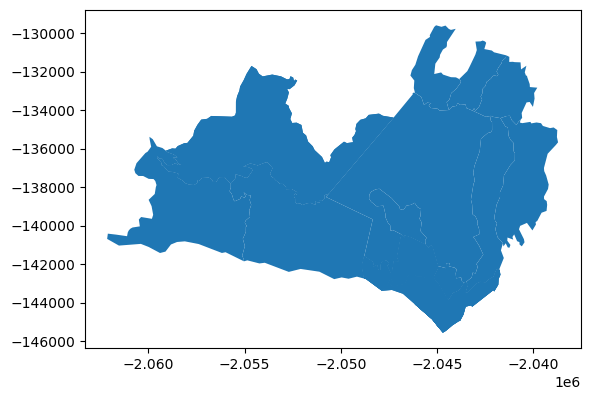

In [11]:
palisade_eji.plot()

In [ ]:
eaton = eaton.to_crs(eji.crs)

(20, 5)


In [ ]:
eaton_eji = gpd.sjoin(eji, eaton)

(38, 179)


,OBJECTID_left,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,...,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry,index_right,OBJECTID_right,type,Shape__Are,Shape__Len
4631,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4825,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7806,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7806,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7806,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

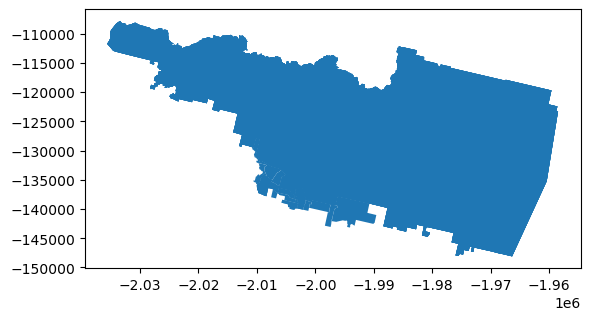

In [14]:
eaton_eji.plot()

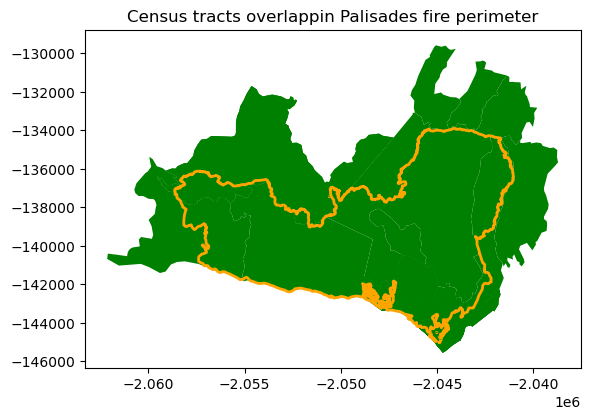

In [ ]:
fig, ax= plt.subplots()

palisade_eji.plot(ax=ax, color= 'green')
palisade.plot(ax=ax, 
              edgecolor= 'orange', 
              color = 'none', 
              linewidth=2)

plt.title('Census tracts overlappin Palisades fire perimeter')

plt.show()

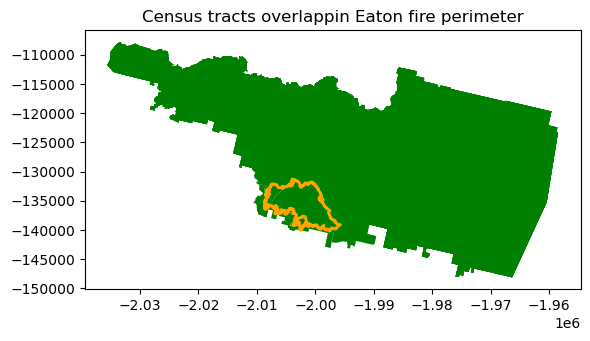

In [44]:
fig, ax= plt.subplots()

eaton_eji.plot(ax=ax, color= 'green')
eaton.plot(ax=ax, 
              edgecolor= 'orange', 
              color = 'none', 
              linewidth=2)

plt.title('Census tracts overlappin Eaton fire perimeter')

plt.show()

## 3. Polygon clipping

Clip the census tracts to the Palisades fire perimeter using geopandas.clip().

Do the same for the Eaton fire perimeter.

Quickly visualize your data.

In [24]:
palisade_eji_clip = gpd.clip(palisade_eji, palisade)
eaton_eji_clip = gpd.clip(eaton_eji, eaton)

<Axes: >

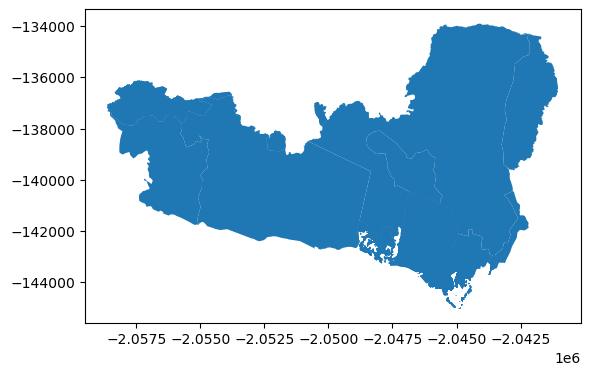

In [25]:
palisade_eji_clip.plot()

<Axes: >

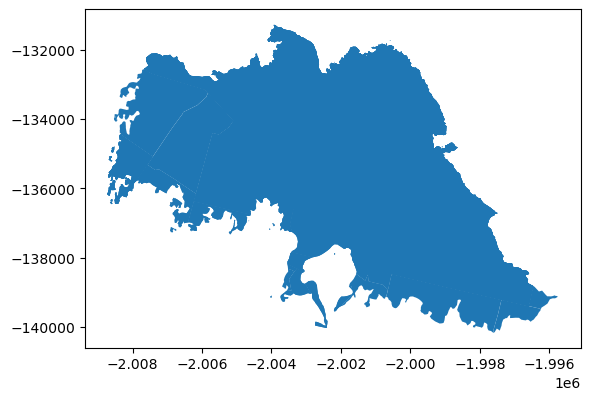

In [26]:
eaton_eji_clip.plot()

<Axes: >

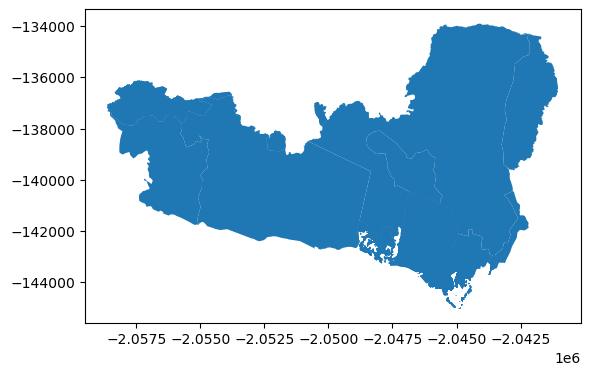

In [30]:
fig, ax= plt.subplots()

# E_POV200, E_UNEMP, E_UNINSUR
palisade_eji_clip.plot(ax=ax)


4. Visualize fire perimeters with a basemap
To add a basemap to our plot we will be using the contextily library.

Import the contextily library at the top of your notebook as ctx. This library is already installed in the EDS 220 environment.

Use and update the code below to plot the fire perimeters adding a basemap:

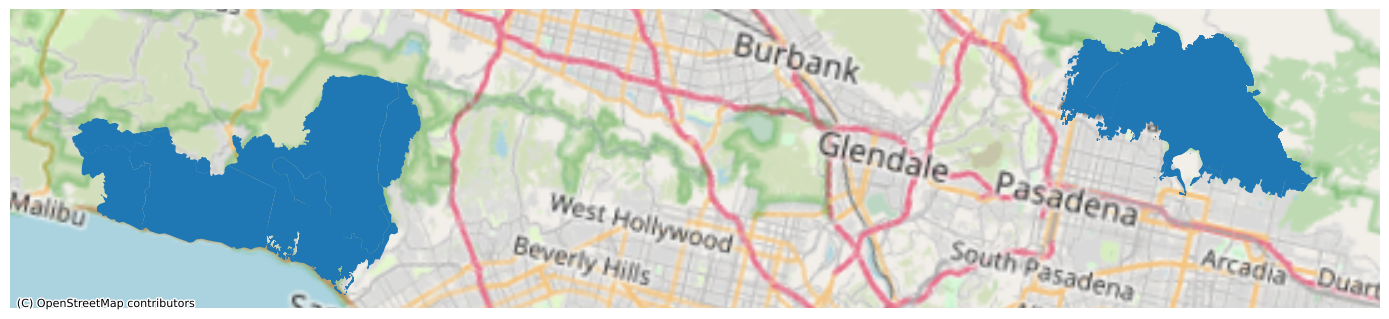

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))


palisade_eji_clip.plot(ax=ax)

eaton_eji_clip.plot(ax=ax)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik,
                crs=palisade_eji_clip.crs)


# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

## 5. Visualize EJI data

Use and update the code below to plot one of the variables you and your team explored in step 1 as being relevant to a community’s response to a wildfire.

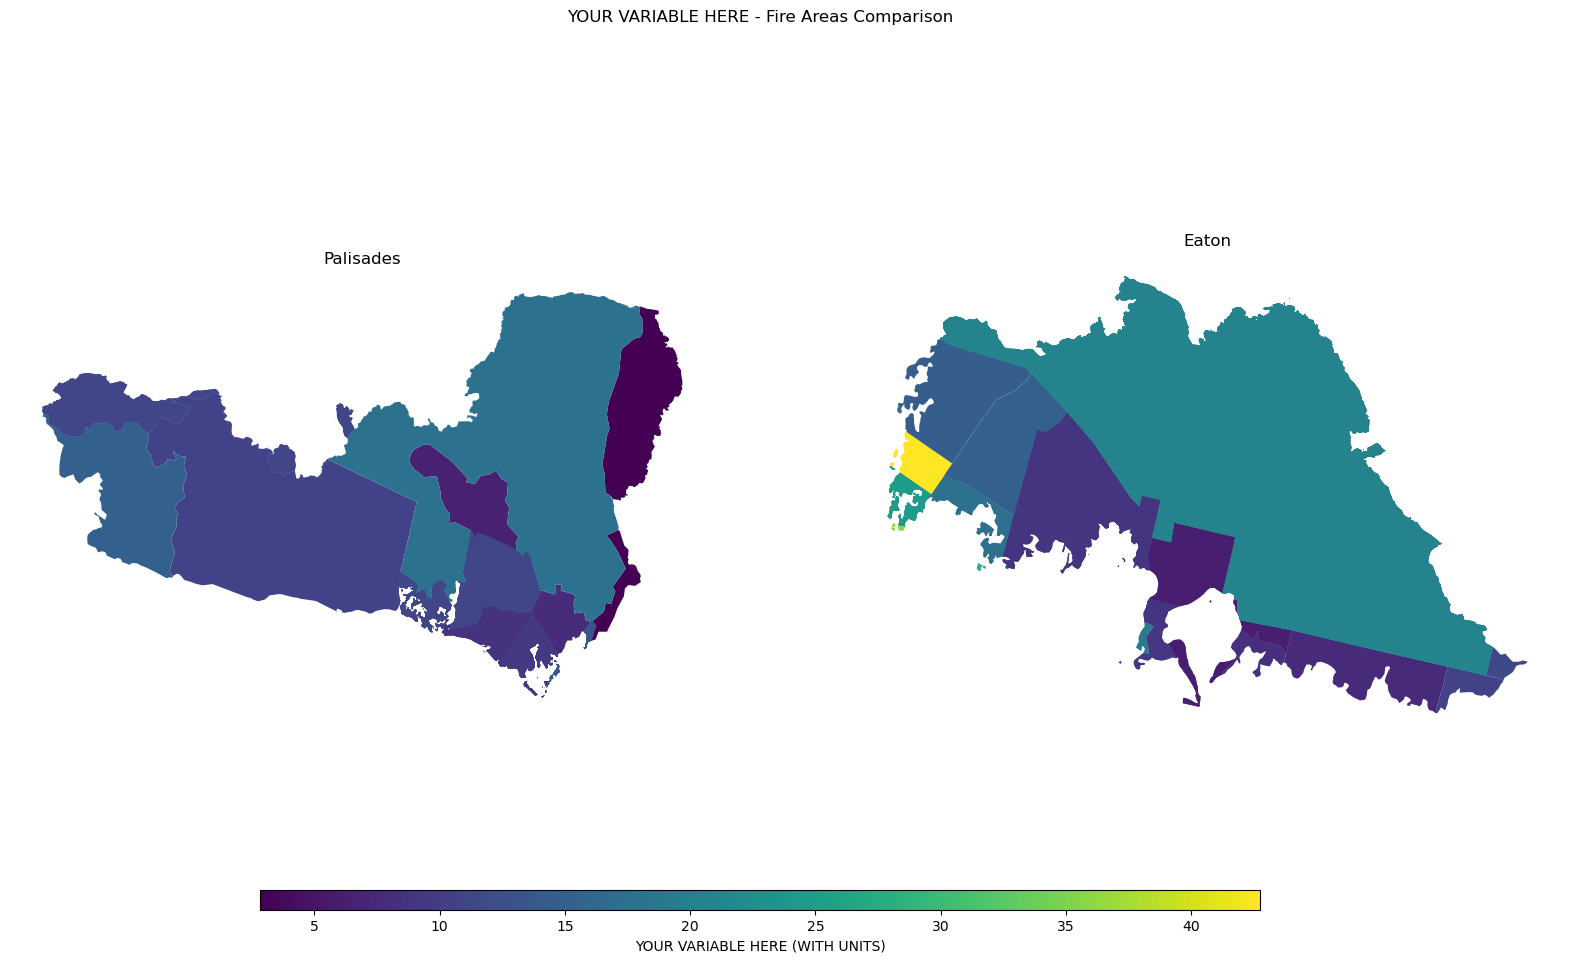

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_POV200'

# Find common min/max for legend range
vmin = min(palisade_eji_clip[eji_variable].min(), palisade_eji_clip[eji_variable].min())
vmax = max(eaton_eji_clip[eji_variable].max(), eaton_eji_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisade_eji_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_eji_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton')
ax2.axis('off')

# Add overall title
fig.suptitle('YOUR VARIABLE HERE - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('YOUR VARIABLE HERE (WITH UNITS)')

plt.show()